In [44]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Settings
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load Data

In [45]:
df = pd.read_csv('Walmart.csv')
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("First few rows:")
df.head()

original_df = df.copy(deep=True)

Dataset Overview:
Shape: (6435, 8)
Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
First few rows:


In [46]:
print("Data Types:")
print(df.dtypes)

print("Missing Values:")
print(df.isnull().sum())

Data Types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


# we can see that date is an object, we cant work with dates with that format

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(columns=['Date'], inplace=True)

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [49]:
display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [50]:
#categorize numerical features and cotegorical features
nu = df[features].nunique().sort_values()
print(nu)



weekday            1
Holiday_Flag       2
year               3
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
dtype: int64


In [51]:
cf = ['weekday', 'month', 'year','Store','Holiday_Flag']
nf = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# EDA


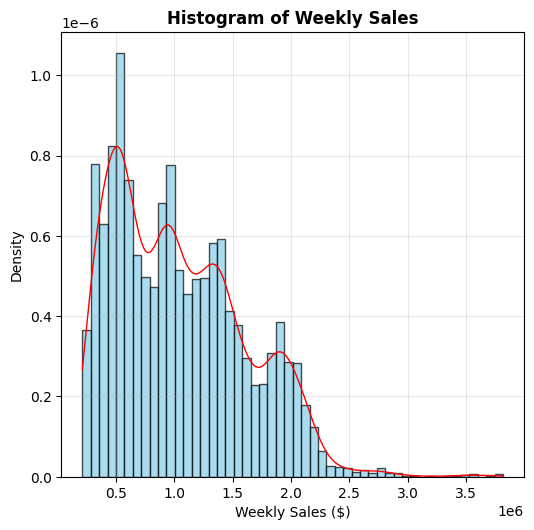

In [52]:
from scipy.stats import gaussian_kde

# Create a comprehensive view of Weekly_Sales distribution
plt.figure(figsize=(15, 10))

# 1. Histogram
plt.subplot(2, 3, 1)
plt.hist(df['Weekly_Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)

kde = gaussian_kde(df['Weekly_Sales'])
x = np.linspace(df['Weekly_Sales'].min(), df['Weekly_Sales'].max(), 200)
y_kde = kde(x)
plt.plot(x, y_kde, 'r-', linewidth=1)


plt.title('Histogram of Weekly Sales', fontweight='bold')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

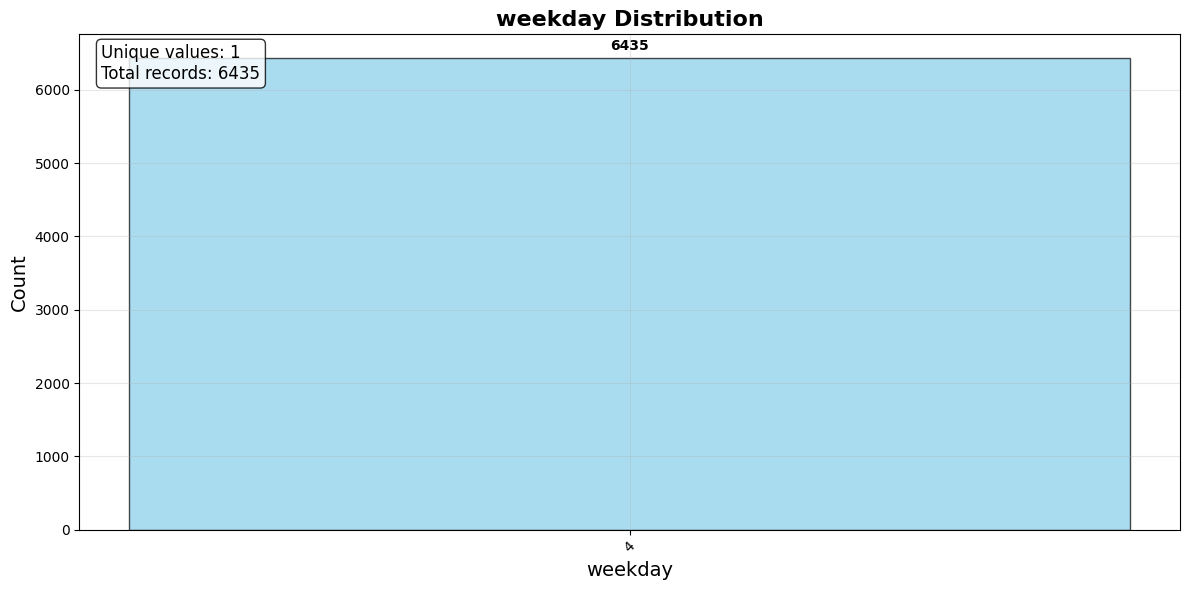

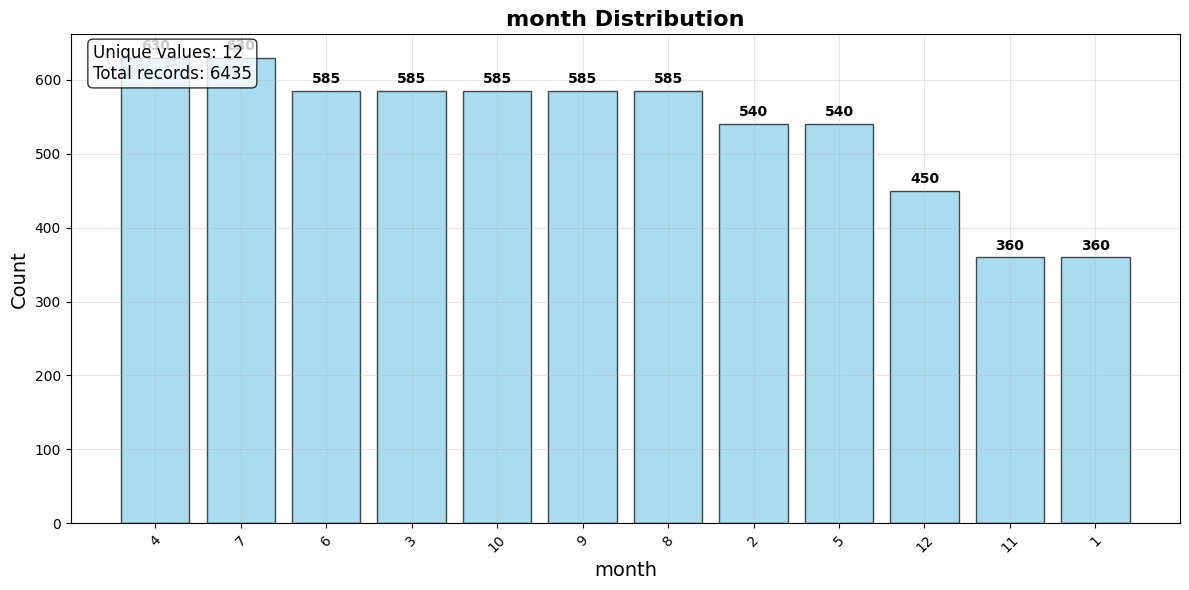

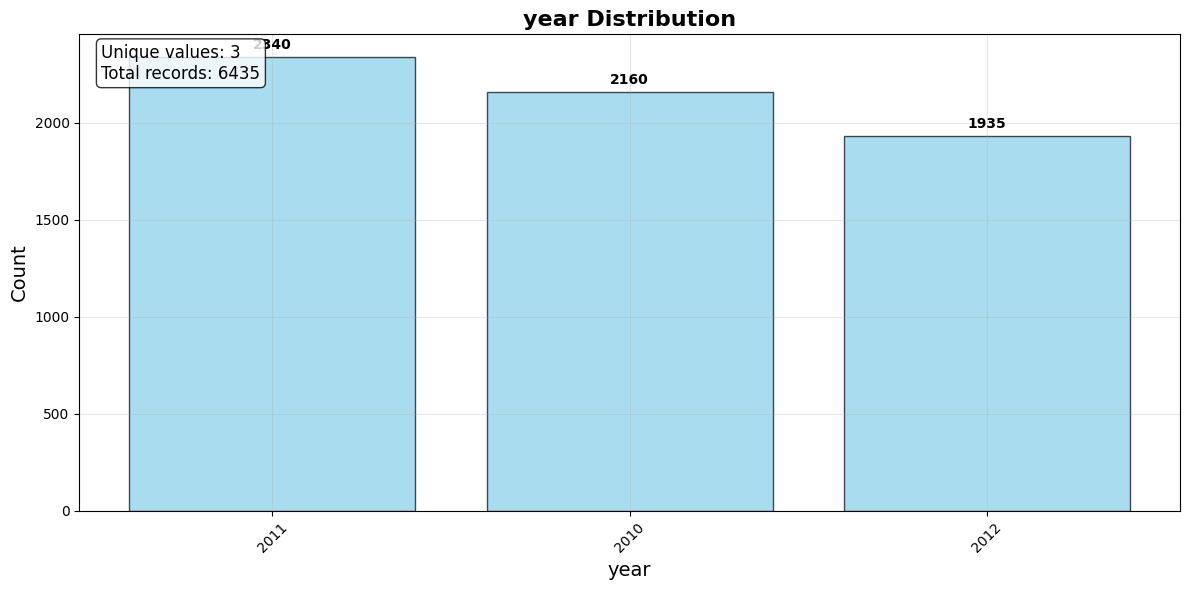

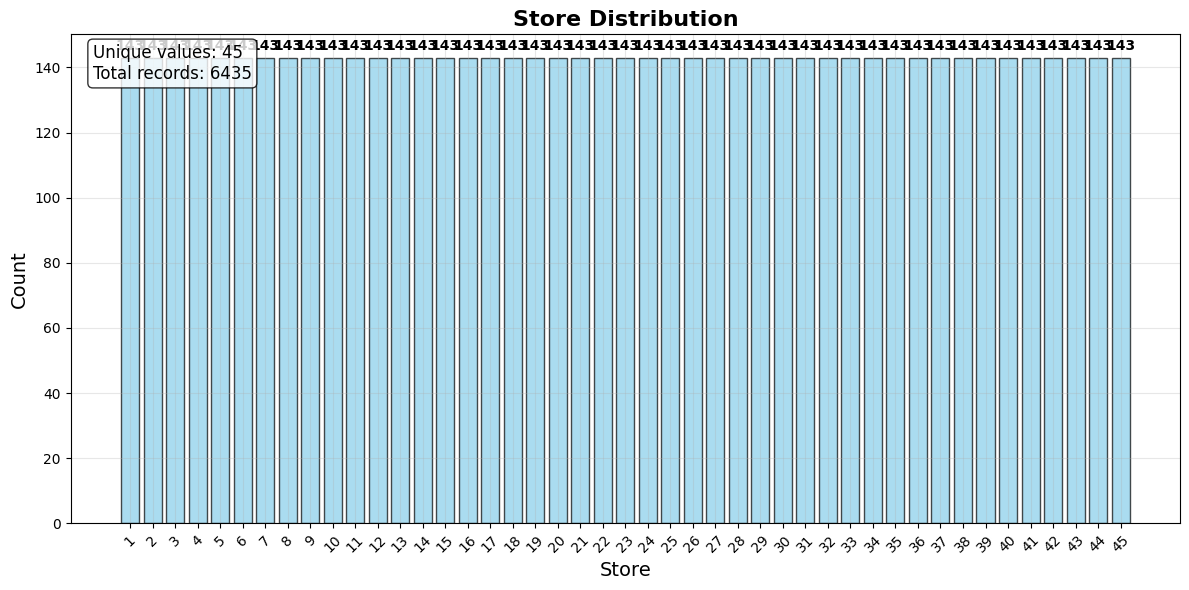

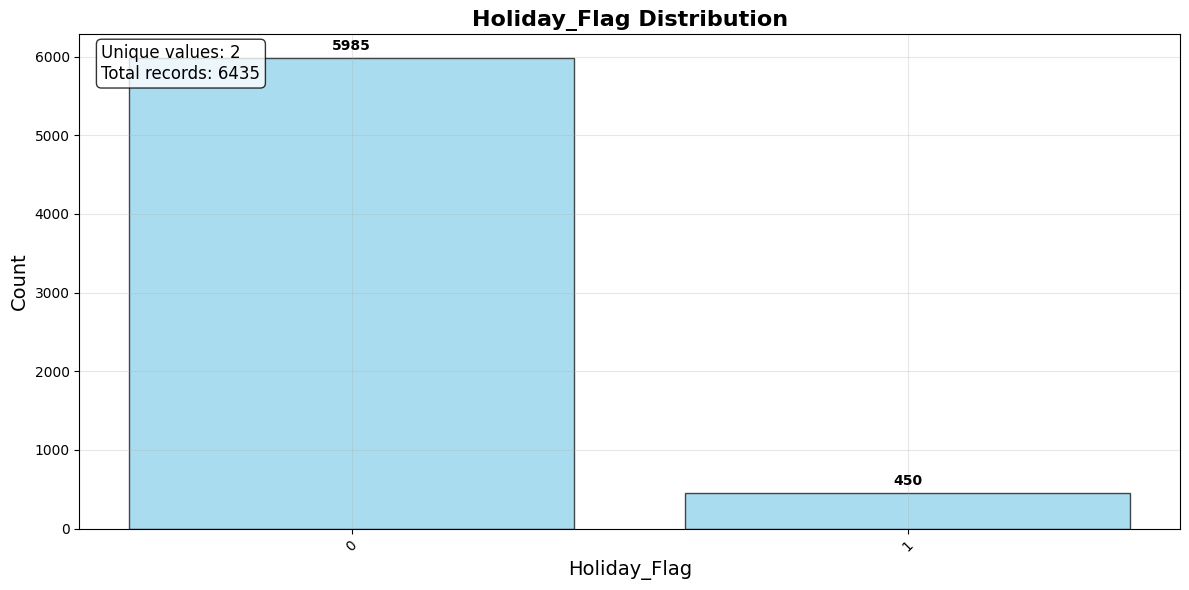

In [55]:
# Individual bar graphs for categorical features (without weekday)
for feature in cf:
    plt.figure(figsize=(12, 6))
    
    # Count values
    value_counts = df[feature].value_counts()
    
    # Create bar plot
    plt.bar(range(len(value_counts)), value_counts.values, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{feature} Distribution', fontweight='bold', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Add value labels on bars
    for j, v in enumerate(value_counts.values):
        plt.text(j, v + max(value_counts.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add statistics
    plt.text(0.02, 0.98, f'Unique values: {len(value_counts)}\nTotal records: {len(df)}', 
            transform=plt.gca().transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

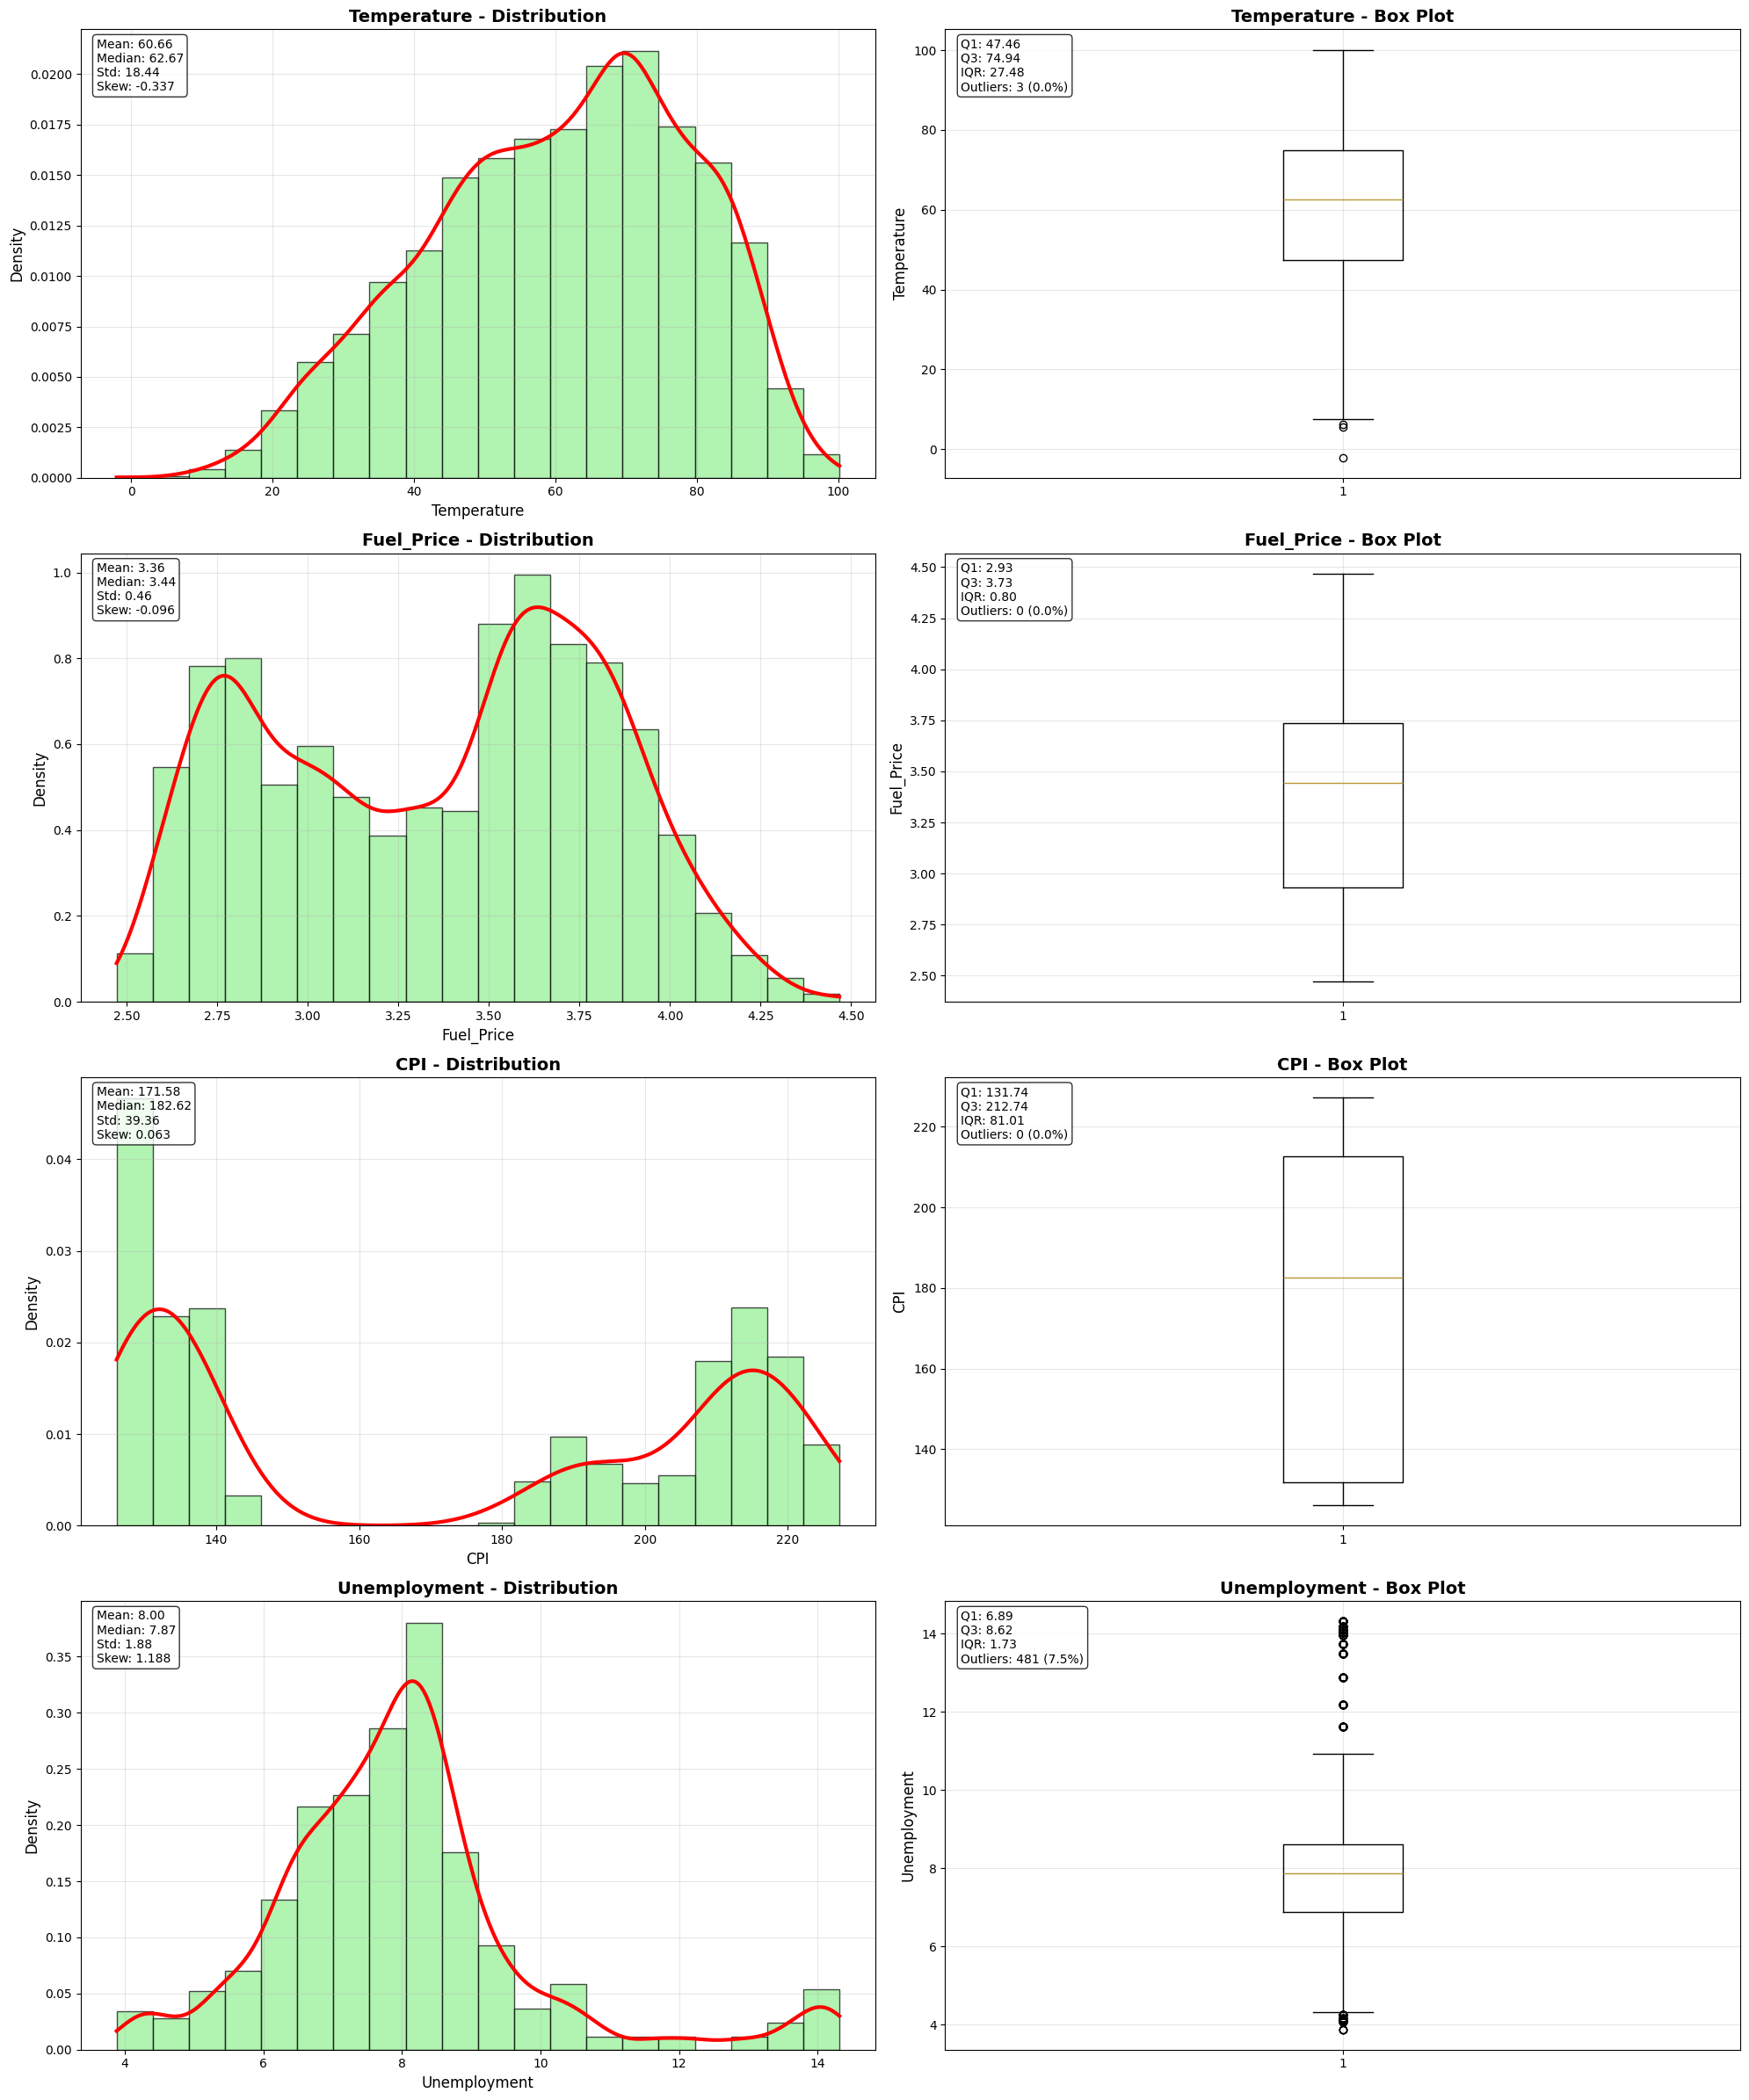

In [58]:
# Create one big container with subplots for all numerical features
fig, axes = plt.subplots(len(nf), 2, figsize=(20, 6*len(nf)))

for i, feature in enumerate(nf):
    # Determine optimal bin size
    data_range = df[feature].max() - df[feature].min()
    optimal_bins = min(50, max(20, int(data_range / (df[feature].std() / 3))))
    
    # Left subplot: Histogram with KDE
    axes[i, 0].hist(df[feature], bins=optimal_bins, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
    
    # KDE line
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(df[feature])
    x = np.linspace(df[feature].min(), df[feature].max(), 300)
    y_kde = kde(x)
    axes[i, 0].plot(x, y_kde, 'r-', linewidth=3)
    
    axes[i, 0].set_title(f'{feature} - Distribution', fontweight='bold', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Density', fontsize=12)
    axes[i, 0].grid(True, alpha=0.3)
    
    # Add statistics to histogram
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()
    skew_val = df[feature].skew()
    
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.3f}'
    axes[i, 0].text(0.02, 0.98, stats_text, transform=axes[i, 0].transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Right subplot: Boxplot
    axes[i, 1].boxplot(df[feature])
    axes[i, 1].set_title(f'{feature} - Box Plot', fontweight='bold', fontsize=14)
    axes[i, 1].set_ylabel(feature, fontsize=12)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Add outlier statistics to boxplot
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[feature][(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    outlier_text = f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}\nIQR: {IQR:.2f}\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)'
    axes[i, 1].text(0.02, 0.98, outlier_text, transform=axes[i, 1].transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# we need this for feature engineering (pairwise plots)